In [1]:
import numpy as np
import pandas as pd

from utils import *
from training import *

In [2]:
# select the channels to be processed
all_channels =  ["Fp1", "Fp2", "F7", "F3", "Fz", "F4", "F8", "FT7", "FC3", "FCZ", "FC4", "FT8", "T3", "C3", "Cz", "C4", "T4", "TP7", "CP3", "CPz", "CP4", "TP8", "T5", "P3", "PZ", "P4", "T6", "O1", "Oz" , "O2"]
csv_file = 'eeg_features.csv'
models = ['K-NN', 'K-NN1', 'K-NN2', 'K-NN3', 'SVM', 'DTC', 'RFC', 'Logistic Regression', 'NN', 'GBC']
dataset = data_loader(path = csv_file)
reduced_dataset = channel_selection(dataset, all_channels)
all_features = reduced_dataset.columns[:len(reduced_dataset.columns) - 2]

## Individual Channel Performances

In [10]:
#all_channels_perf = pd.DataFrame(columns=all_channels)
#all_channels_perf = dict.fromkeys(all_channels, None)
all_channels_perf = {}

import time, tqdm
start = time.time()

for channel in tqdm.tqdm(all_channels):
    reduced_dataset = channel_selection(dataset, [channel])
    all_features = reduced_dataset.columns[:len(reduced_dataset.columns) - 1]
    data = data_preparation(dataset=reduced_dataset, feature_subset=all_features)
    for model in models:
        all_channels_perf[channel + '-' + model] = model_training(data, model, stats=False)

end = time.time()
print(end-start)

100%|██████████| 30/30 [13:06<00:00, 26.20s/it]

786.0755877494812


In [11]:
all_channels_perf_df = pd.DataFrame.from_dict(all_channels_perf)
all_channels_perf_df.to_csv('indv_channel_perfs.csv')

#df = all_channels_perf_df
#sorted_df = df.sort_values(df.last_valid_index(), axis=1)
#sorted_df.to_csv('sorted.csv')

## Feature Performances

In [7]:
csv_file = 'eeg_features.csv'
models = ['K-NN', 'K-NN1', 'K-NN2', 'K-NN3', 'SVM', 'DTC', 'RFC', 'Logistic Regression', 'NN', 'GBC']
dataset = data_loader(path = csv_file)

selected_channels = ["Cz","CP3","CPz","P3"]
reduced_dataset = channel_selection(dataset, selected_channels)
all_features = reduced_dataset.columns[:len(reduced_dataset.columns) - 1]

In [8]:
feature_subsets = {}
feature_subsets['bands'] = ['delta_power', 'theta_power',
       'alpha_power', 'beta_power', 'gamma_power', 'gamma_beta', 'gamma_alpha',
       'gamma_theta', 'gamma_delta', 'beta_alpha', 'beta_theta', 'beta_delta',
       'alpha_theta', 'alpha_delta', 'theta_delta']

feature_subsets['time_features'] = ['skew', 'kurtosis', 'rms', 'activity', 'mobility', 'complexity', 'dfa', 'mean_abs_sec_dif']

feature_subsets['freq_features'] = ['spc_cnt', 'spc_roff', 'zc', 'slope']

feature_subsets['mfcc_features'] = ['mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3',
       'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9']

feature_subsets['mel_features'] = ['mel_0', 'mel_1', 'mel_2',
               'mel_3', 'mel_4', 'mel_5', 'mel_6', 'mel_7', 'mel_8', 'mel_9', 'mel_10',
               'mel_11', 'mel_12', 'mel_13', 'mel_14']

feature_subsets['chr_features'] = ['chr_0',
                'chr_1', 'chr_2', 'chr_3', 'chr_4', 'chr_5', 'chr_6', 'chr_7', 'chr_8',
                'chr_9', 'chr_10', 'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15',
                'chr_16', 'chr_17', 'chr_18', 'chr_19']

feature_subsets['ton_features'] = ['ton_0', 'ton_1', 'ton_2', 'ton_3', 'ton_4', 'ton_5']

feature_subsets['spectral_features'] = feature_subsets['mfcc_features'] + feature_subsets['mel_features']

feature_subsets['music'] = feature_subsets['chr_features'] + feature_subsets['ton_features']

feature_subsets['coeffs'] = feature_subsets['spectral_features'] + feature_subsets['music']

feature_subsets['comb_domain'] = feature_subsets['time_features'] + feature_subsets['freq_features'] + feature_subsets['bands']

feature_subsets['no_music'] = feature_subsets['spectral_features'] + feature_subsets['comb_domain']

feature_subsets['all'] = feature_subsets['coeffs'] + feature_subsets['comb_domain']

In [12]:
for k in feature_subsets:
    print("-------Feature Subset: {} -------".format(k))
    data = data_preparation(dataset=reduced_dataset, feature_subset=feature_subsets[k])
    for model in models:
        model_training(data, model, stats=True, cm=False)


-------Feature Subset: bands -------

==== Stats_dict for the K-NN model ====
Training Accuracy:  0.7242658423493045
Test Accuracy:  0.7175525339925835
Sensitivity (Recall): 0.6645962732919255
Precision: 0.7409972299168975
F1_score: 0.7007203667321545
AUC: 0.7172919865844621
Logloss: 10.18043856540577


==== Stats_dict for the K-NN1 model ====
Training Accuracy:  1.0
Test Accuracy:  0.7163164400494437
Sensitivity (Recall): 0.7490683229813665
Precision: 0.7011627906976744
F1_score: 0.7243243243243244
AUC: 0.7164775809248776
Logloss: 10.224991907048684


==== Stats_dict for the K-NN2 model ====
Training Accuracy:  0.8571870170015456
Test Accuracy:  0.69221260815822
Sensitivity (Recall): 0.537888198757764
Precision: 0.774597495527728
F1_score: 0.6348973607038123
AUC: 0.691453324471133
Logloss: 11.093782069085503


==== Stats_dict for the K-NN3 model ====
Training Accuracy:  0.8601236476043277
Test Accuracy:  0.7194066749072929
Sensitivity (Recall): 0.7416149068322981
Precision: 0.70818505

In [37]:
feature_results = {}
for model in models:
    for k in feature_subsets:
        data = data_preparation(dataset=reduced_dataset, feature_subset=feature_subsets[k])
        feature_results[k] = model_training(data, model, stats=False, cm=False)

    features_perf_df = pd.DataFrame.from_dict(feature_results)
    features_perf_df.to_csv('outs/{}_feature_perf.csv'.format(model))

In [38]:
feature_results = {}
reduced_dataset1 = channel_selection(dataset, ["Cz","CP3","CPz","P3", 'O1'])
for model in models:
    for k in feature_subsets:
        data = data_preparation(dataset=reduced_dataset1, feature_subset=feature_subsets[k])
        feature_results[k] = model_training(data, model, stats=False, cm=False)

    features_perf_df = pd.DataFrame.from_dict(feature_results)
    features_perf_df.to_csv('{}_feature_perfO1.csv'.format(model))

## K-Fold Denemesi, sonra training.py'a eklenecek

In [2]:
csv_file = 'eeg_features.csv'
models = ['K-NN', 'K-NN1', 'K-NN2', 'K-NN3', 'SVM', 'DTC', 'RFC', 'NN', 'GBC', 'Logistic Regression']
dataset = data_loader(path = csv_file)
selected_channels = ["Cz","CP3","CPz","P3"]
reduced_dataset = channel_selection(dataset, selected_channels)
all_features = reduced_dataset.columns[:len(reduced_dataset.columns) - 1]
data = data_preparation(dataset=reduced_dataset, feature_subset=all_features)
model_training(data, 'K-NN', stats=True, cm=False)

test_model = KNeighborsClassifier(leaf_size= 10, n_neighbors= int(np.sqrt(np.prod(data[0].shape))), p= 1)
X = utils.feature_selection(dataset=reduced_dataset, feature_subset=all_features)

labels = reduced_dataset.iloc[:, -1:]
y = labels  


==== Stats_dict for the K-NN model ====
Training Accuracy:  0.7474497681607419
Test Accuracy:  0.7323856613102596
Sensitivity (Recall): 0.6832298136645962
Precision: 0.7554945054945055
F1_score: 0.7175472928897586
AUC: 0.732143812121351
Logloss: 9.645798465690806



In [12]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf.get_n_splits(X)
cv_results = pd.DataFrame()

model = KNeighborsClassifier(leaf_size= 10, n_neighbors= int(np.sqrt(np.prod(data[0].shape))), p= 1)
scores = cross_val_score(model, X, y, cv=5)
cv_results[model] = np.mean(scores)
print("{}: {}".format(model, np.mean(scores)))

model = SVC()
scores = cross_val_score(model, X, y, cv=5)
cv_results[model] = np.mean(scores)
print("{}: {}".format(model, np.mean(scores)))

for model in models[1:len(models)]:
    scores = cross_val_score(model_switch(model), X, y, cv=5)
    print("{}: {}".format(model, np.mean(scores)))
    cv_results[model] = np.mean(scores)

cv_results.to_csv('outs/cross_val.csv')

KNeighborsClassifier(leaf_size=10, n_neighbors=714, p=1): 0.7185924735103615
SVC(): 0.7413451637537811
K-NN1: 0.9240867849555825
K-NN2: 0.8596640454136482
K-NN3: 0.872281529759898
SVM: 0.5346212560763153
DTC: 0.7601396014074806
RFC: 0.8478022066226198


/Users/kemalcankucuk/Documents/PAWS Work/paws/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kemalcankucuk/Documents/PAWS Work/paws/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression: 0.7486409464336359
NN: 0.500123609394314
GBC: 0.8794537030454389


## Model Performances

In [3]:
all_features = reduced_dataset.columns[:-2] # last two columns are subject and label
X_train, X_test, y_train, y_test = data_preparation(dataset=reduced_dataset, feature_subset=all_features)


==== Stats_dict for the SVM model ====
Training Accuracy:  0.9990108803165183
Test Accuracy:  0.8967194197164523
Sensitivity (Recall): 0.8766606527800558
Precision: 0.9143003763256928
F1_score: 0.8950849870216864
AUC: 0.8968224556360925
Logloss: 3.722609437567079



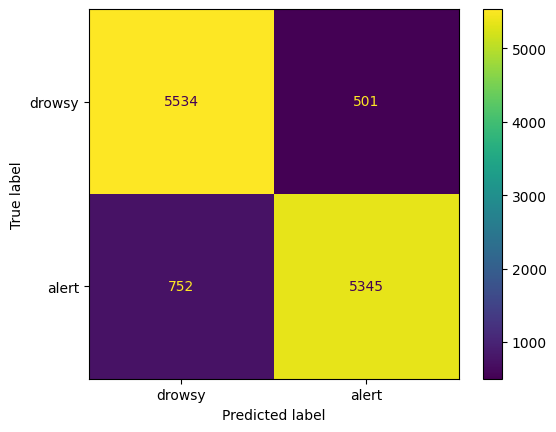

In [6]:
results = model_training(data = [X_train, X_test, y_train, y_test], model_family='SVM', stats=True)